# FLIGHT PREDICTION FOR FLASK 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

C:\Users\rups1\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.shape,test_data.shape

((82424, 18), (20606, 18))

In [4]:
train_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,1997,2,"30,194",31423,"Dallas/Fort Worth, TX","Des Moines, IA",624,211,152.58,AA,0.720,150.45,NJ,0.1100,103.09,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Des Moines, IA\n(41.588822, -93.620309)"
1,2008,3,"30,529",30559,"Hartford, CT","Seattle, WA",2431,262,257.30,UA,0.230,277.29,DL,0.2200,227.96,1,"Hartford, CT\n(41.765775, -72.673356)","Seattle, WA\n(47.603229, -122.33028)"
2,1997,1,"31,295",32337,"Detroit, MI","Indianapolis, IN",231,436,188.58,NW,0.880,199.77,WN,0.0700,81.81,1,"Detroit, MI\n(42.332916, -83.047853)","Indianapolis, IN\n(39.76845, -86.156212)"
3,2008,2,"30,325",31136,"Denver, CO","Jacksonville, FL",1447,237,201.27,DL,0.240,222.20,F9,0.1400,151.53,1,"Denver, CO\n(39.738453, -104.984853)","Jacksonville, FL\n(30.325968, -81.65676)"
4,2018,1,"30,599",31703,"Birmingham, AL","New York City, NY (Metropolitan Area)",902,289,279.44,DL,0.663,288.73,AA,0.2095,268.04,-1,"Birmingham, AL\n(33.522859, -86.807705)","New York City, NY (Metropolitan Area)\n(40.123..."


In [5]:
dep_city = train_data['city1'].str.split(' ',expand=True)

In [6]:
train_data[['DepCity','DepCity1','DepCity2','DepCity3','DepCity4','Depcity5']] = train_data['city1'].str.split(' ',expand=True)

In [7]:
train_data.drop(["citymarketid_1","Geocoded_City2","city1","table_1_flag","Geocoded_City1","Geocoded_City2"], axis = 1, inplace = True)

In [8]:
train_data["DepCity"].str.strip(",").str.get(0)

0        D
1        H
2        D
3        D
4        B
        ..
82419    O
82420    B
82421    H
82422    N
82423    C
Name: DepCity, Length: 82424, dtype: object

In [9]:
train_data

,Year,quarter,citymarketid_2,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,DepCity,DepCity1,DepCity2,DepCity3,DepCity4,Depcity5
0,1997,2,31423,"Des Moines, IA",624,211,152.58,AA,0.7200,150.45,NJ,0.1100,103.09,Dallas/Fort,"Worth,",TX,None,None,None
1,2008,3,30559,"Seattle, WA",2431,262,257.30,UA,0.2300,277.29,DL,0.2200,227.96,"Hartford,",CT,None,None,None,None
2,1997,1,32337,"Indianapolis, IN",231,436,188.58,NW,0.8800,199.77,WN,0.0700,81.81,"Detroit,",MI,None,None,None,None
3,2008,2,31136,"Jacksonville, FL",1447,237,201.27,DL,0.2400,222.20,F9,0.1400,151.53,"Denver,",CO,None,None,None,None
4,2018,1,31703,"New York City, NY (Metropolitan Area)",902,289,279.44,DL,0.6630,288.73,AA,0.2095,268.04,"Birmingham,",AL,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82419,2021,2,30559,"Seattle, WA",2554,886,225.69,AS,0.4305,231.11,AS,0.4305,231.11,"Orlando,",FL,None,None,None,None
82420,2014,4,31884,"Spokane, WA",287,278,135.57,WN,0.9200,129.27,WN,0.9200,129.27,"Boise,",ID,None,None,None,None
82421,2013,3,30198,"Pittsburgh, PA",1131,581,310.65,UA,0.5700,344.72,WN,0.2300,247.17,"Houston,",TX,None,None,None,None
82422,2003,1,34576,"Rochester, NY",285,832,103.20,B6,0.6400,78.93,B6,0.6400,78.93,New,York,"City,",NY,(Metropolitan,Area)


In [10]:
train_data.drop(["citymarketid_2"], axis = 1, inplace = True)

In [11]:
train_data.drop(["DepCity1","DepCity2","DepCity3","DepCity4","Depcity5"], axis = 1, inplace = True)

In [12]:
train_data["DepCity"].str.strip(",").str.get(0)

0        D
1        H
2        D
3        D
4        B
        ..
82419    O
82420    B
82421    H
82422    N
82423    C
Name: DepCity, Length: 82424, dtype: object

In [13]:
train_data[['ArrivalCity','DepCity1','DepCity2','DepCity3','DepCity4','Depcity5']] = train_data['city2'].str.split(' ',expand=True)

In [14]:
train_data['DepCity'] = train_data['DepCity'].str.replace(r",",'')

In [15]:
train_data['DepCity'] = train_data['DepCity'].str.replace(r"/",'')

In [16]:

train_data['ArrivalCity'] = train_data['ArrivalCity'].str.replace(r",",'')

In [17]:
train_data['ArrivalCity'] = train_data['ArrivalCity'].str.replace(r"/",'')

In [18]:
train_data['passengers'] = train_data['passengers'].str.replace(r",",'')

In [19]:
train_data

,Year,quarter,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,DepCity,ArrivalCity,DepCity1,DepCity2,DepCity3,DepCity4,Depcity5
0,1997,2,"Des Moines, IA",624,211,152.58,AA,0.7200,150.45,NJ,0.1100,103.09,DallasFort,Des,"Moines,",IA,None,None,None
1,2008,3,"Seattle, WA",2431,262,257.30,UA,0.2300,277.29,DL,0.2200,227.96,Hartford,Seattle,WA,None,None,None,None
2,1997,1,"Indianapolis, IN",231,436,188.58,NW,0.8800,199.77,WN,0.0700,81.81,Detroit,Indianapolis,IN,None,None,None,None
3,2008,2,"Jacksonville, FL",1447,237,201.27,DL,0.2400,222.20,F9,0.1400,151.53,Denver,Jacksonville,FL,None,None,None,None
4,2018,1,"New York City, NY (Metropolitan Area)",902,289,279.44,DL,0.6630,288.73,AA,0.2095,268.04,Birmingham,New,York,"City,",NY,(Metropolitan,Area)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82419,2021,2,"Seattle, WA",2554,886,225.69,AS,0.4305,231.11,AS,0.4305,231.11,Orlando,Seattle,WA,None,None,None,None
82420,2014,4,"Spokane, WA",287,278,135.57,WN,0.9200,129.27,WN,0.9200,129.27,Boise,Spokane,WA,None,None,None,None
82421,2013,3,"Pittsburgh, PA",1131,581,310.65,UA,0.5700,344.72,WN,0.2300,247.17,Houston,Pittsburgh,PA,None,None,None,None
82422,2003,1,"Rochester, NY",285,832,103.20,B6,0.6400,78.93,B6,0.6400,78.93,New,Rochester,NY,None,None,None,None


In [20]:
train_data.drop(["DepCity1","DepCity2","DepCity3","DepCity4","Depcity5"], axis = 1, inplace = True)

In [21]:
train_data.drop(["city2","large_ms","fare_lg","carrier_low","fare_low", "lf_ms"], axis = 1, inplace = True)

In [22]:
train_data

,Year,quarter,nsmiles,passengers,fare,carrier_lg,DepCity,ArrivalCity
0,1997,2,624,211,152.58,AA,DallasFort,Des
1,2008,3,2431,262,257.30,UA,Hartford,Seattle
2,1997,1,231,436,188.58,NW,Detroit,Indianapolis
3,2008,2,1447,237,201.27,DL,Denver,Jacksonville
4,2018,1,902,289,279.44,DL,Birmingham,New
...,...,...,...,...,...,...,...,...
82419,2021,2,2554,886,225.69,AS,Orlando,Seattle
82420,2014,4,287,278,135.57,WN,Boise,Spokane
82421,2013,3,1131,581,310.65,UA,Houston,Pittsburgh
82422,2003,1,285,832,103.20,B6,New,Rochester


In [23]:
# Airline
train_data["carrier_lg"].replace({'KW':'Other', 
                                                        'n7':'Other',
                                                        'DH':'Other',
                                                        'RP':'Other',
                                                         'KP':'Other',
                                                        'PN':'Other',
                                                        'T3':'Other',
                                                        'ZA':'Other',
                                                        'XJ':'Other',
                                                        '9N':'Other'
                                  
                                                   },    
                                        inplace=True)

In [24]:
train_data["carrier_lg"].value_counts()

WN       22178
DL       14604
AA       11489
UA        7466
US        7150
NW        4277
CO        3327
AS        2744
B6        1860
FL        1381
G4        1338
F9         861
HP         766
TW         704
NK         703
YX         685
TZ         293
JI         148
QQ          92
SY          80
W7          66
Other       32
NJ          31
U5          25
WV          24
QX          20
RU          18
W9          15
N7          13
YV          11
J7           8
ZW           8
SX           6
VX           1
Name: carrier_lg, dtype: int64

In [25]:
# Airline
train_data["carrier_lg"].replace({'NJ':'Other', 
                                                        'U5':'Other',
                                                        'WV':'Other',
                                                        'QX':'Other',
                                                         'RU':'Other',
                                                        'W9':'Other',
                                                        'N7':'Other',
                                                        'YV':'Other',
                                                        'J7':'Other',
                                   'SX':'Other',
                                                        'VX':'Other',
                                                        'ZW':'Other'
                                  
                                                   },    
                                        inplace=True)

In [26]:
train_data["carrier_lg"].value_counts()

WN       22178
DL       14604
AA       11489
UA        7466
US        7150
NW        4277
CO        3327
AS        2744
B6        1860
FL        1381
G4        1338
F9         861
HP         766
TW         704
NK         703
YX         685
TZ         293
Other      212
JI         148
QQ          92
SY          80
W7          66
Name: carrier_lg, dtype: int64

In [27]:
# Airline


In [28]:
# Airline
   
                              

In [29]:
train_data["carrier_lg"].value_counts()

WN       22178
DL       14604
AA       11489
UA        7466
US        7150
NW        4277
CO        3327
AS        2744
B6        1860
FL        1381
G4        1338
F9         861
HP         766
TW         704
NK         703
YX         685
TZ         293
Other      212
JI         148
QQ          92
SY          80
W7          66
Name: carrier_lg, dtype: int64

In [30]:
train_data["DepCity"].value_counts()

Atlanta            4751
Chicago            4548
DallasFort         4179
Boston             4053
New                3421
                   ... 
Portsmouth            1
Hilton                1
Ashland               1
Sioux                 1
Charlottesville       1
Name: DepCity, Length: 142, dtype: int64

In [31]:
train_data.drop(["nsmiles","passengers"], axis = 1, inplace = True)

In [32]:
train_data["ArrivalCity"].value_counts()

San              8509
Washington       5617
New              4891
Tampa            3723
Seattle          3279
                 ... 
Kalispell           1
SaginawBay          1
Lincoln             1
Shreveport          1
MontroseDelta       1
Name: ArrivalCity, Length: 127, dtype: int64

In [33]:
train_data


,Year,quarter,fare,carrier_lg,DepCity,ArrivalCity
0,1997,2,152.58,AA,DallasFort,Des
1,2008,3,257.30,UA,Hartford,Seattle
2,1997,1,188.58,NW,Detroit,Indianapolis
3,2008,2,201.27,DL,Denver,Jacksonville
4,2018,1,279.44,DL,Birmingham,New
...,...,...,...,...,...,...
82419,2021,2,225.69,AS,Orlando,Seattle
82420,2014,4,135.57,WN,Boise,Spokane
82421,2013,3,310.65,UA,Houston,Pittsburgh
82422,2003,1,103.20,B6,New,Rochester


In [34]:
train_data["DepCity"].value_counts()

Atlanta            4751
Chicago            4548
DallasFort         4179
Boston             4053
New                3421
                   ... 
Portsmouth            1
Hilton                1
Ashland               1
Sioux                 1
Charlottesville       1
Name: DepCity, Length: 142, dtype: int64

In [35]:
train_data["DepCity"].value_counts(ascending=True)

Charlottesville       1
Ashland               1
Hilton                1
Portsmouth            1
Sioux                 1
                   ... 
New                3421
Boston             4053
DallasFort         4179
Chicago            4548
Atlanta            4751
Name: DepCity, Length: 142, dtype: int64

In [36]:
train_data["DepCity"].value_counts().loc[lambda x : x < 500]

Sacramento         478
Colorado           475
Pittsburgh         463
Dayton             460
Norfolk            448
                  ... 
Portsmouth           1
Hilton               1
Ashland              1
Sioux                1
Charlottesville      1
Name: DepCity, Length: 101, dtype: int64

In [37]:
value_counts = train_data['DepCity'].value_counts()

In [38]:
to_remove = value_counts[value_counts <= 1000].index

In [39]:
train_data = train_data[~train_data.DepCity.isin(to_remove)]

In [40]:


train_data["DepCity"].value_counts().loc[lambda x : x > 100]

Atlanta           4751
Chicago           4548
DallasFort        4179
Boston            4053
New               3421
Denver            3359
Houston           2984
Las               2866
Los               2834
Detroit           2437
Charlotte         2375
Austin            2280
Miami             1987
Cleveland         1931
Kansas            1832
San               1609
Albuquerque       1598
MinneapolisSt.    1580
Columbus          1576
Orlando           1460
Indianapolis      1383
Cincinnati        1317
Phoenix           1304
Hartford          1244
Nashville         1198
Philadelphia      1069
Buffalo           1048
Name: DepCity, dtype: int64

In [41]:
train_data['ArrivalCity'].value_counts().loc[lambda x : x < 1000]

Kansas           915
West             897
Milwaukee        851
Denver           834
Norfolk          809
                ... 
Traverse           1
SaginawBay         1
Lincoln            1
Shreveport         1
MontroseDelta      1
Name: ArrivalCity, Length: 107, dtype: int64

In [42]:
value_counts1 = train_data['ArrivalCity'].value_counts()

In [43]:
to_remove1 = value_counts1[value_counts1 <= 1000].index

In [44]:
train_data = train_data[~train_data.ArrivalCity.isin(to_remove1)]

In [45]:
train_data['ArrivalCity'].value_counts().loc[lambda x : x > 100]

San               5951
New               3096
Washington        2392
Seattle           2266
Tampa             2245
Phoenix           2053
St.               2031
Orlando           1978
Portland          1783
RaleighDurham     1743
Philadelphia      1738
Salt              1557
MinneapolisSt.    1528
Los               1497
Miami             1478
Las               1394
Pittsburgh        1381
Nashville         1282
Sacramento        1258
Houston           1067
Name: ArrivalCity, dtype: int64

In [46]:
train_data["DepCity"].value_counts()

New               2327
Boston            1910
Denver            1901
DallasFort        1895
Chicago           1885
Atlanta           1882
Houston           1819
Detroit           1748
Las               1719
Kansas            1692
Los               1580
Austin            1567
Miami             1531
Charlotte         1482
MinneapolisSt.    1467
Cleveland         1426
Columbus          1295
Indianapolis      1210
San               1203
Nashville         1145
Orlando           1130
Hartford          1119
Albuquerque       1078
Cincinnati        1023
Phoenix            984
Philadelphia       925
Buffalo            775
Name: DepCity, dtype: int64

In [47]:
train_data["ArrivalCity"].value_counts()

San               5951
New               3096
Washington        2392
Seattle           2266
Tampa             2245
Phoenix           2053
St.               2031
Orlando           1978
Portland          1783
RaleighDurham     1743
Philadelphia      1738
Salt              1557
MinneapolisSt.    1528
Los               1497
Miami             1478
Las               1394
Pittsburgh        1381
Nashville         1282
Sacramento        1258
Houston           1067
Name: ArrivalCity, dtype: int64

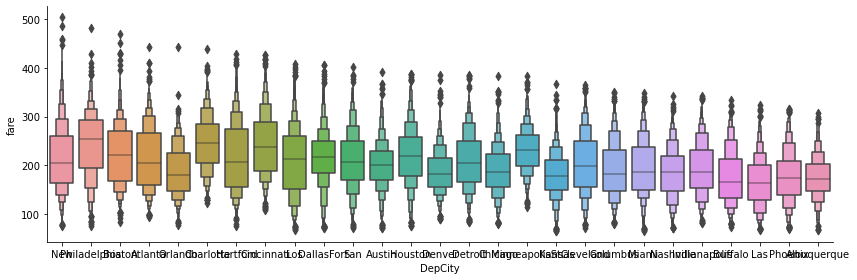

In [48]:
# Source vs Price

sns.catplot(y = "fare", x = "DepCity", data = train_data.sort_values("fare", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [49]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["DepCity"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,DepCity_Atlanta,DepCity_Austin,DepCity_Boston,DepCity_Buffalo,DepCity_Charlotte,DepCity_Chicago,DepCity_Cincinnati,DepCity_Cleveland,DepCity_Columbus,DepCity_DallasFort,...,DepCity_Las,DepCity_Los,DepCity_Miami,DepCity_MinneapolisSt.,DepCity_Nashville,DepCity_New,DepCity_Orlando,DepCity_Philadelphia,DepCity_Phoenix,DepCity_San
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
train_data

,Year,quarter,fare,carrier_lg,DepCity,ArrivalCity
1,2008,3,257.30,UA,Hartford,Seattle
5,2015,1,204.18,WN,Phoenix,Portland
6,2017,4,170.86,DL,Cincinnati,Miami
7,2003,1,82.55,WN,Las,San
10,2013,4,358.92,UA,New,San
...,...,...,...,...,...,...
82413,2010,2,112.45,WN,Los,San
82414,1997,2,89.74,WN,Chicago,Nashville
82419,2021,2,225.69,AS,Orlando,Seattle
82421,2013,3,310.65,UA,Houston,Pittsburgh


In [51]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["ArrivalCity"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,ArrivalCity_Las,ArrivalCity_Los,ArrivalCity_Miami,ArrivalCity_MinneapolisSt.,ArrivalCity_Nashville,ArrivalCity_New,ArrivalCity_Orlando,ArrivalCity_Philadelphia,ArrivalCity_Phoenix,ArrivalCity_Pittsburgh,ArrivalCity_Portland,ArrivalCity_RaleighDurham,ArrivalCity_Sacramento,ArrivalCity_Salt,ArrivalCity_San,ArrivalCity_Seattle,ArrivalCity_St.,ArrivalCity_Tampa,ArrivalCity_Washington
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
Airline = train_data[["carrier_lg"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,carrier_lg_AS,carrier_lg_B6,carrier_lg_CO,carrier_lg_DL,carrier_lg_F9,carrier_lg_FL,carrier_lg_G4,carrier_lg_HP,carrier_lg_JI,carrier_lg_NK,carrier_lg_NW,carrier_lg_Other,carrier_lg_SY,carrier_lg_TW,carrier_lg_TZ,carrier_lg_UA,carrier_lg_US,carrier_lg_WN,carrier_lg_YX
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
Airline = train_data[["carrier_lg"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,carrier_lg_AS,carrier_lg_B6,carrier_lg_CO,carrier_lg_DL,carrier_lg_F9,carrier_lg_FL,carrier_lg_G4,carrier_lg_HP,carrier_lg_JI,carrier_lg_NK,carrier_lg_NW,carrier_lg_Other,carrier_lg_SY,carrier_lg_TW,carrier_lg_TZ,carrier_lg_UA,carrier_lg_US,carrier_lg_WN,carrier_lg_YX
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
train_data["quarter"].value_counts()

3    10152
2    10034
1     9877
4     9655
Name: quarter, dtype: int64

In [55]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [56]:
data_train.drop(["carrier_lg", "DepCity", "ArrivalCity"], axis = 1, inplace = True)

In [57]:
data_train.head()

,Year,quarter,fare,carrier_lg_AS,carrier_lg_B6,carrier_lg_CO,carrier_lg_DL,carrier_lg_F9,carrier_lg_FL,carrier_lg_G4,...,ArrivalCity_Pittsburgh,ArrivalCity_Portland,ArrivalCity_RaleighDurham,ArrivalCity_Sacramento,ArrivalCity_Salt,ArrivalCity_San,ArrivalCity_Seattle,ArrivalCity_St.,ArrivalCity_Tampa,ArrivalCity_Washington
1,2008,3,257.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2015,1,204.18,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2017,4,170.86,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2003,1,82.55,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,2013,4,358.92,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
data_train.shape

(39718, 67)

In [59]:
data_train.columns

Index(['Year', 'quarter', 'fare', 'carrier_lg_AS', 'carrier_lg_B6',
       'carrier_lg_CO', 'carrier_lg_DL', 'carrier_lg_F9', 'carrier_lg_FL',
       'carrier_lg_G4', 'carrier_lg_HP', 'carrier_lg_JI', 'carrier_lg_NK',
       'carrier_lg_NW', 'carrier_lg_Other', 'carrier_lg_SY', 'carrier_lg_TW',
       'carrier_lg_TZ', 'carrier_lg_UA', 'carrier_lg_US', 'carrier_lg_WN',
       'carrier_lg_YX', 'DepCity_Atlanta', 'DepCity_Austin', 'DepCity_Boston',
       'DepCity_Buffalo', 'DepCity_Charlotte', 'DepCity_Chicago',
       'DepCity_Cincinnati', 'DepCity_Cleveland', 'DepCity_Columbus',
       'DepCity_DallasFort', 'DepCity_Denver', 'DepCity_Detroit',
       'DepCity_Hartford', 'DepCity_Houston', 'DepCity_Indianapolis',
       'DepCity_Kansas', 'DepCity_Las', 'DepCity_Los', 'DepCity_Miami',
       'DepCity_MinneapolisSt.', 'DepCity_Nashville', 'DepCity_New',
       'DepCity_Orlando', 'DepCity_Philadelphia', 'DepCity_Phoenix',
       'DepCity_San', 'ArrivalCity_Las', 'ArrivalCity_Los',
       '

In [61]:
X = data_train.loc[:, ['Year', 'quarter', 'carrier_lg_AS',
       'carrier_lg_B6', 'carrier_lg_CO', 'carrier_lg_DL', 'carrier_lg_F9',
       'carrier_lg_FL', 'carrier_lg_G4', 'carrier_lg_HP', 'carrier_lg_NK',
       'carrier_lg_NW', 'carrier_lg_Other', 'carrier_lg_TW', 'carrier_lg_UA',
       'carrier_lg_US', 'carrier_lg_WN', 'carrier_lg_YX', 'DepCity_Atlanta',
       'DepCity_Austin', 'DepCity_Boston', 'DepCity_Buffalo',
       'DepCity_Charlotte', 'DepCity_Chicago', 'DepCity_Cincinnati',
       'DepCity_Cleveland', 'DepCity_Columbus', 'DepCity_DallasFort',
       'DepCity_Denver', 'DepCity_Detroit', 'DepCity_Hartford',
       'DepCity_Houston', 'DepCity_Indianapolis', 'DepCity_Kansas',
       'DepCity_Las', 'DepCity_Los', 'DepCity_Miami', 'DepCity_MinneapolisSt.',
       'DepCity_Nashville', 'DepCity_New', 'DepCity_Orlando',
       'DepCity_Philadelphia', 'DepCity_Phoenix', 'DepCity_San',
       'ArrivalCity_Las', 'ArrivalCity_Los', 'ArrivalCity_Miami',
       'ArrivalCity_MinneapolisSt.', 'ArrivalCity_Nashville',
       'ArrivalCity_New', 'ArrivalCity_Orlando', 'ArrivalCity_Philadelphia',
       'ArrivalCity_Phoenix', 'ArrivalCity_Pittsburgh', 'ArrivalCity_Portland',
       'ArrivalCity_RaleighDurham', 'ArrivalCity_Sacramento',
       'ArrivalCity_Salt', 'ArrivalCity_San', 'ArrivalCity_Seattle',
       'ArrivalCity_St.', 'ArrivalCity_Tampa', 'ArrivalCity_Washington']]

X.head()

,Year,quarter,carrier_lg_AS,carrier_lg_B6,carrier_lg_CO,carrier_lg_DL,carrier_lg_F9,carrier_lg_FL,carrier_lg_G4,carrier_lg_HP,...,ArrivalCity_Pittsburgh,ArrivalCity_Portland,ArrivalCity_RaleighDurham,ArrivalCity_Sacramento,ArrivalCity_Salt,ArrivalCity_San,ArrivalCity_Seattle,ArrivalCity_St.,ArrivalCity_Tampa,ArrivalCity_Washington
1,2008,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2015,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2017,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2003,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,2013,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
y = data_train.iloc[:, 2]
y.head()

1     257.30
5     204.18
6     170.86
7      82.55
10    358.92
Name: fare, dtype: float64

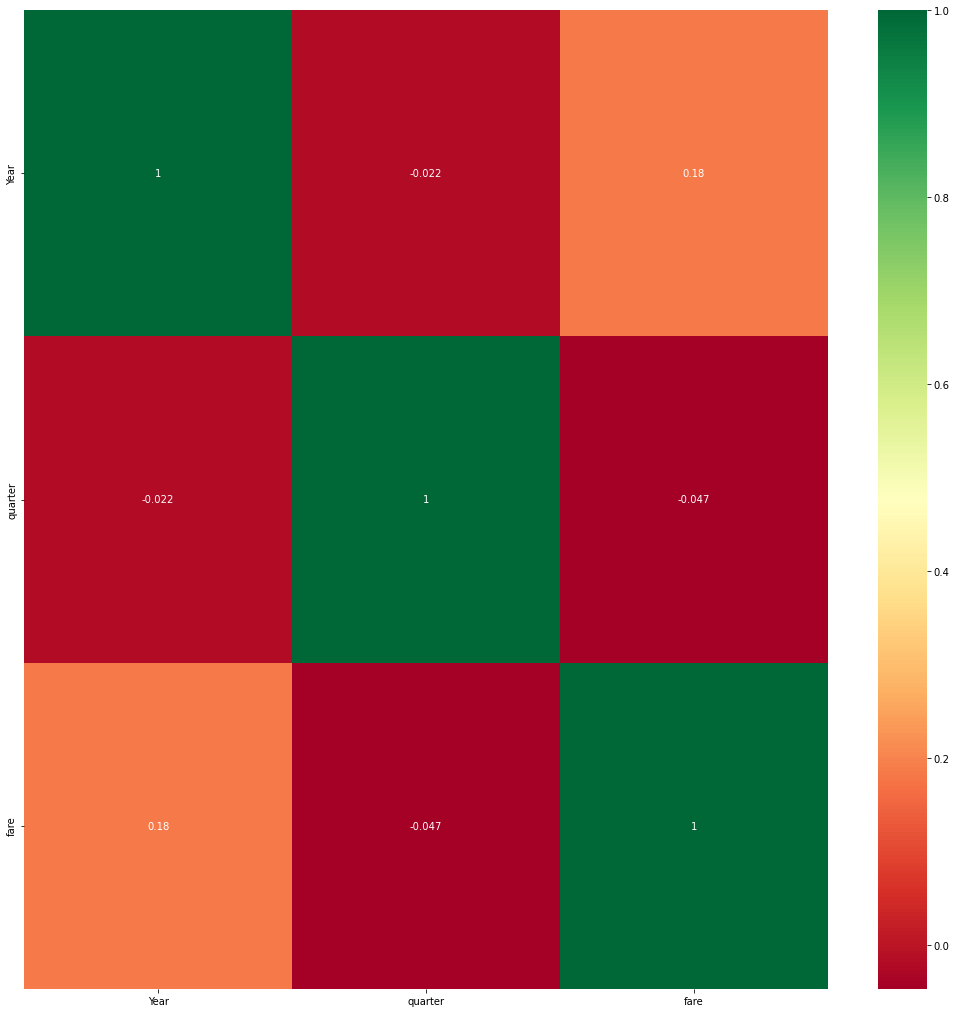

In [63]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()


In [64]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.39292040e-01 3.35933470e-02 1.35841585e-02 3.26319858e-03
 4.42448795e-03 9.27487606e-03 2.13905472e-03 9.25308056e-04
 1.12073098e-04 1.97064212e-03 2.70088565e-04 2.52812678e-03
 7.38822072e-04 8.88264968e-04 1.47245347e-02 1.11610696e-02
 9.56534690e-02 1.36913538e-04 9.24416302e-03 9.92622637e-03
 1.38795762e-02 7.06396808e-03 1.07301511e-02 1.27462860e-02
 1.37847018e-02 7.71309695e-03 1.00534765e-02 1.77974624e-02
 1.97292322e-02 7.72900890e-03 8.84352194e-03 9.86595217e-03
 9.79765313e-03 1.17871839e-02 1.37339374e-02 3.70333370e-02
 9.81885314e-03 1.10869199e-02 4.46478587e-03 1.13022557e-02
 1.21695148e-02 7.30117026e-03 1.01078761e-02 1.20685110e-02
 1.11214655e-02 9.48184895e-03 1.35802494e-02 9.11425054e-03
 8.87293182e-03 1.45330282e-02 2.57133096e-02 1.01645363e-02
 1.28981827e-02 6.92797328e-03 8.03248365e-03 1.44334268e-02
 1.06827127e-02 7.89848662e-03 3.91321053e-02 8.44577365e-03
 1.05769340e-02 1.74788621e-02 1.64521412e-02]


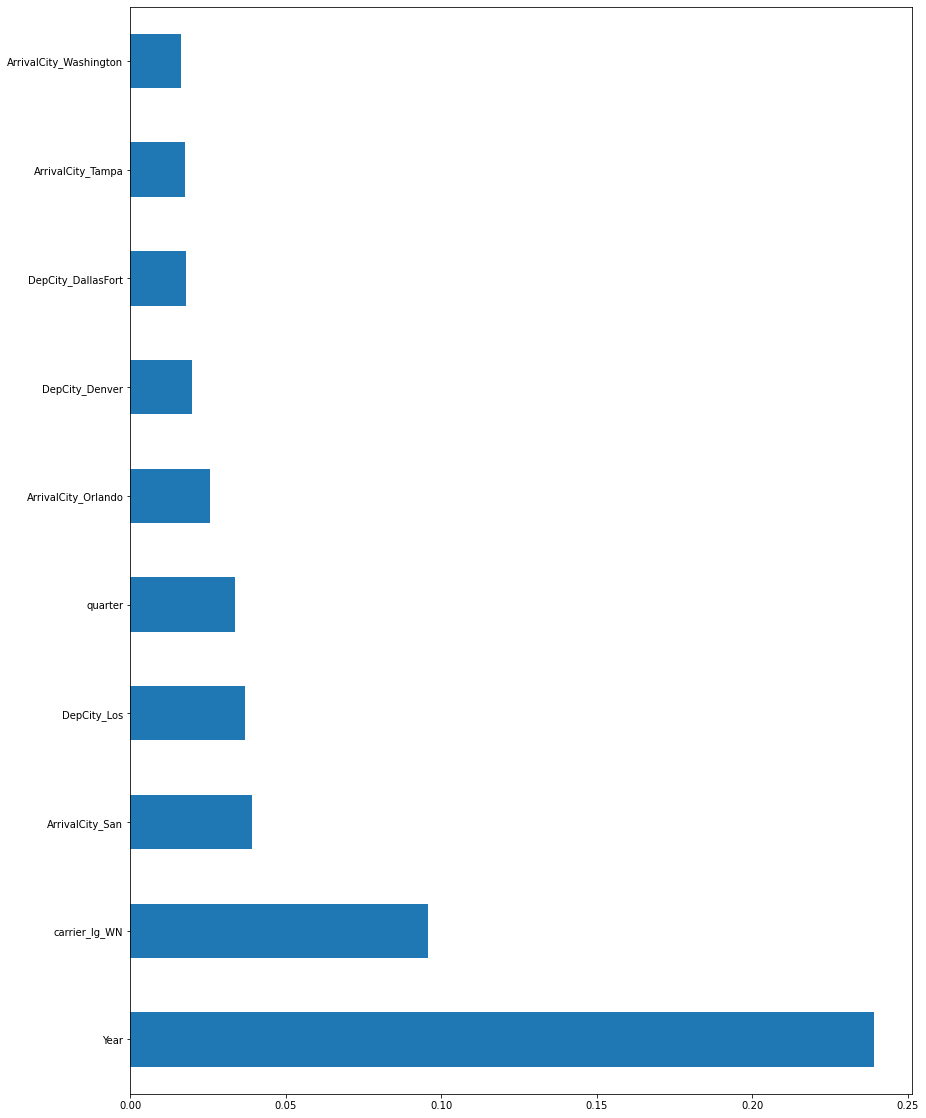

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (14,20))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = reg_rf.predict(X_test)

In [70]:
reg_rf.score(X_train, y_train)

0.9569614180289188

In [71]:
reg_rf.score(X_test, y_test)

0.8393723833193297

C:\Users\rups1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


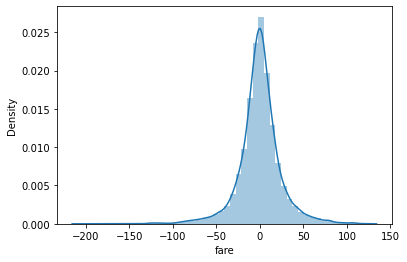

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

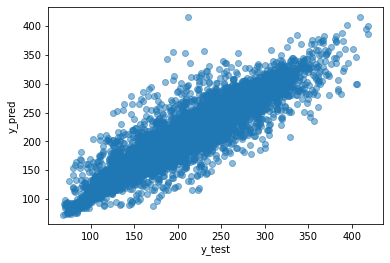

In [73]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
from sklearn import metrics

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.615424553290502
MSE: 604.1842428672916
RMSE: 24.580159537059387


In [76]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

4.752764288637294

In [77]:
metrics.r2_score(y_test, y_pred)

0.8393723833193297

In [78]:
##Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [85]:
prediction = rf_random.predict(X_test)

C:\Users\rups1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


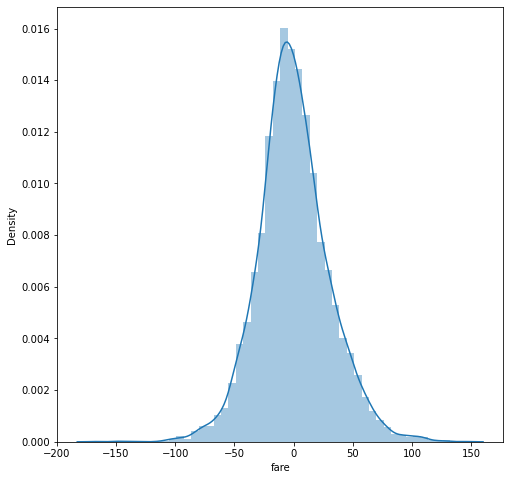

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

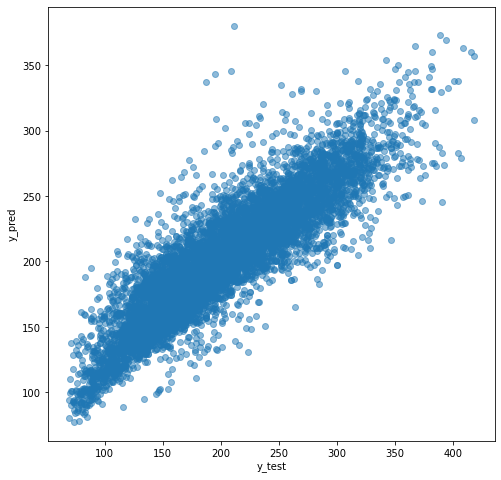

In [87]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

MAE: 22.96161817385883
MSE: 909.520609406895
RMSE: 30.158259389541946


In [107]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [108]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load (model)

In [109]:
y_prediction = forest.predict(X_test)

In [110]:
metrics.r2_score(y_test, y_prediction)

0.8393723833193297